### Plot timeseries of AW core - detrended and normalized

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

Open theta datasets

In [10]:
theta_row000_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_row025_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_row050_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_row075_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_row100_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_row125_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_row150_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

Open salinity datasets

In [11]:
salt_row000_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_row025_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_row050_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_row075_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_row100_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_row125_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_row150_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

Add vertical cell thickness as coordinate for depth-weighted averaging

In [9]:
## load geometry file
ecco_geometry = xr.open_dataset("SASSIE_N1_geometry_v3.nc")

## extract upper 72 depth cells to match melville ecco dataset
ecco_vert_thickness = ecco_geometry.isel(k=slice(0,72)).drF.rename({"k":"depth"}) # grid cell vertical thickness (m)
## get total
ecco_vert_thickness_total = ecco_vert_thickness.sum()

In [13]:
theta_row000 = theta_row000_ds.assign_coords({'drF':ecco_vert_thickness})
theta_row025 = theta_row025_ds.assign_coords({'drF':ecco_vert_thickness})
theta_row050 = theta_row050_ds.assign_coords({'drF':ecco_vert_thickness})
theta_row075 = theta_row075_ds.assign_coords({'drF':ecco_vert_thickness})
theta_row100 = theta_row100_ds.assign_coords({'drF':ecco_vert_thickness})
theta_row125 = theta_row125_ds.assign_coords({'drF':ecco_vert_thickness})
theta_row150 = theta_row150_ds.assign_coords({'drF':ecco_vert_thickness})

salt_row000 = salt_row000_ds.assign_coords({'drF':ecco_vert_thickness})
salt_row025 = salt_row025_ds.assign_coords({'drF':ecco_vert_thickness})
salt_row050 = salt_row050_ds.assign_coords({'drF':ecco_vert_thickness})
salt_row075 = salt_row075_ds.assign_coords({'drF':ecco_vert_thickness})
salt_row100 = salt_row100_ds.assign_coords({'drF':ecco_vert_thickness})
salt_row125 = salt_row125_ds.assign_coords({'drF':ecco_vert_thickness})
salt_row150 = salt_row150_ds.assign_coords({'drF':ecco_vert_thickness})

Extract boxes we want

In [15]:
# isolate AW box in each row
theta_row000_AW = theta_row000.sel(depth=slice(275,375)).isel(cols=slice(185,210))
theta_row025_AW = theta_row025.sel(depth=slice(275,370)).isel(cols=slice(160,180))
theta_row050_AW = theta_row050.sel(depth=slice(290,375)).isel(cols=slice(145,160))
theta_row075_AW = theta_row075.sel(depth=slice(295,370)).isel(cols=slice(145,170))
theta_row100_AW = theta_row100.sel(depth=slice(300,375)).isel(cols=slice(125,155))
theta_row125_AW = theta_row125.sel(depth=slice(290,380)).isel(cols=slice(125,145))
theta_row150_AW = theta_row150.sel(depth=slice(320,380)).isel(cols=slice(130,145))

salt_row000_AW = salt_row000.sel(depth=slice(275,375)).isel(cols=slice(185,210))
salt_row025_AW = salt_row025.sel(depth=slice(275,370)).isel(cols=slice(160,180))
salt_row050_AW = salt_row050.sel(depth=slice(290,375)).isel(cols=slice(145,160))
salt_row075_AW = salt_row075.sel(depth=slice(295,370)).isel(cols=slice(145,170))
salt_row100_AW = salt_row100.sel(depth=slice(300,375)).isel(cols=slice(125,155))
salt_row125_AW = salt_row125.sel(depth=slice(290,380)).isel(cols=slice(125,145))
salt_row150_AW = salt_row150.sel(depth=slice(320,380)).isel(cols=slice(130,145))

Mask land cells

In [16]:
## mask land cells
theta_row000_AW = theta_row000_AW.where(salt_row000_AW.SALT>0)
theta_row025_AW = theta_row025_AW.where(salt_row025_AW.SALT>0)
theta_row050_AW = theta_row050_AW.where(salt_row050_AW.SALT>0)
theta_row075_AW = theta_row075_AW.where(salt_row075_AW.SALT>0)
theta_row100_AW = theta_row100_AW.where(salt_row100_AW.SALT>0)
theta_row125_AW = theta_row125_AW.where(salt_row125_AW.SALT>0)
theta_row150_AW = theta_row150_AW.where(salt_row150_AW.SALT>0)

salt_row000_AW = salt_row000_AW.where(salt_row000_AW.SALT>0)
salt_row025_AW = salt_row025_AW.where(salt_row025_AW.SALT>0)
salt_row050_AW = salt_row050_AW.where(salt_row050_AW.SALT>0)
salt_row075_AW = salt_row075_AW.where(salt_row075_AW.SALT>0)
salt_row100_AW = salt_row100_AW.where(salt_row100_AW.SALT>0)
salt_row125_AW = salt_row125_AW.where(salt_row125_AW.SALT>0)
salt_row150_AW = salt_row150_AW.where(salt_row150_AW.SALT>0)

Unweighted average

In [23]:
# take mean of boxes
theta_row000_AW_mean = theta_row000_AW.mean(['cols','depth'],skipna=True).THETA
theta_row025_AW_mean = theta_row025_AW.mean(['cols','depth'],skipna=True).THETA
theta_row050_AW_mean = theta_row050_AW.mean(['cols','depth'],skipna=True).THETA
theta_row075_AW_mean = theta_row075_AW.mean(['cols','depth'],skipna=True).THETA
theta_row100_AW_mean = theta_row100_AW.mean(['cols','depth'],skipna=True).THETA
theta_row125_AW_mean = theta_row125_AW.mean(['cols','depth'],skipna=True).THETA
theta_row150_AW_mean = theta_row150_AW.mean(['cols','depth'],skipna=True).THETA

salt_row000_AW_mean = salt_row000_AW.mean(['cols','depth'],skipna=True).SALT
salt_row025_AW_mean = salt_row025_AW.mean(['cols','depth'],skipna=True).SALT
salt_row050_AW_mean = salt_row050_AW.mean(['cols','depth'],skipna=True).SALT
salt_row075_AW_mean = salt_row075_AW.mean(['cols','depth'],skipna=True).SALT
salt_row100_AW_mean = salt_row100_AW.mean(['cols','depth'],skipna=True).SALT
salt_row125_AW_mean = salt_row125_AW.mean(['cols','depth'],skipna=True).SALT
salt_row150_AW_mean = salt_row150_AW.mean(['cols','depth'],skipna=True).SALT

Depth-weighted average over boxes

In [51]:
# take mean of boxes
theta_row000_AW_mean = (theta_row000_AW*theta_row000_AW.drF).sum(dim=['depth','cols'],skipna=True)/(theta_row000_AW.drF.sum())
theta_row025_AW_mean = (theta_row025_AW*theta_row025_AW.drF).sum(dim=['depth','cols'],skipna=True)/(theta_row025_AW.drF.sum())
theta_row050_AW_mean = (theta_row050_AW*theta_row050_AW.drF).sum(dim=['depth','cols'],skipna=True)/(theta_row050_AW.drF.sum())
theta_row075_AW_mean = (theta_row075_AW*theta_row075_AW.drF).sum(dim=['depth','cols'],skipna=True)/(theta_row075_AW.drF.sum())
theta_row100_AW_mean = (theta_row100_AW*theta_row100_AW.drF).sum(dim=['depth','cols'],skipna=True)/(theta_row100_AW.drF.sum())
theta_row125_AW_mean = (theta_row125_AW*theta_row125_AW.drF).sum(dim=['depth','cols'],skipna=True)/(theta_row125_AW.drF.sum())
theta_row150_AW_mean = (theta_row150_AW*theta_row150_AW.drF).sum(dim=['depth','cols'],skipna=True)/(theta_row150_AW.drF.sum())

salt_row000_AW_mean = (salt_row000_AW*salt_row000_AW.drF).sum(dim=['depth','cols'],skipna=True)/(salt_row000_AW.drF.sum())
salt_row025_AW_mean = (salt_row025_AW*salt_row025_AW.drF).sum(dim=['depth','cols'],skipna=True)/(salt_row025_AW.drF.sum())
salt_row050_AW_mean = (salt_row050_AW*salt_row050_AW.drF).sum(dim=['depth','cols'],skipna=True)/(salt_row050_AW.drF.sum())
salt_row075_AW_mean = (salt_row075_AW*salt_row075_AW.drF).sum(dim=['depth','cols'],skipna=True)/(salt_row075_AW.drF.sum())
salt_row100_AW_mean = (salt_row100_AW*salt_row100_AW.drF).sum(dim=['depth','cols'],skipna=True)/(salt_row100_AW.drF.sum())
salt_row125_AW_mean = (salt_row125_AW*salt_row125_AW.drF).sum(dim=['depth','cols'],skipna=True)/(salt_row125_AW.drF.sum())
salt_row150_AW_mean = (salt_row150_AW*salt_row150_AW.drF).sum(dim=['depth','cols'],skipna=True)/(salt_row150_AW.drF.sum())

### Detrend time series

In [47]:
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

In [52]:
theta_row000_detrended = detrend_dim(theta_row000_AW_mean.THETA,'time')
theta_row025_detrended = detrend_dim(theta_row025_AW_mean.THETA,'time')
theta_row050_detrended = detrend_dim(theta_row050_AW_mean.THETA,'time')
theta_row075_detrended = detrend_dim(theta_row075_AW_mean.THETA,'time')
theta_row100_detrended = detrend_dim(theta_row100_AW_mean.THETA,'time')
theta_row125_detrended = detrend_dim(theta_row125_AW_mean.THETA,'time')
theta_row150_detrended = detrend_dim(theta_row150_AW_mean.THETA,'time')

salt_row000_detrended = detrend_dim(salt_row000_AW_mean.SALT,'time')
salt_row025_detrended = detrend_dim(salt_row025_AW_mean.SALT,'time')
salt_row050_detrended = detrend_dim(salt_row050_AW_mean.SALT,'time')
salt_row075_detrended = detrend_dim(salt_row075_AW_mean.SALT,'time')
salt_row100_detrended = detrend_dim(salt_row100_AW_mean.SALT,'time')
salt_row125_detrended = detrend_dim(salt_row125_AW_mean.SALT,'time')
salt_row150_detrended = detrend_dim(salt_row150_AW_mean.SALT,'time')

### Plot daily time series

Normalize values

In [71]:
theta_row000_detrended_norm = (theta_row000_detrended-theta_row000_detrended.mean())/theta_row000_detrended.std()
theta_row025_detrended_norm = (theta_row025_detrended-theta_row025_detrended.mean())/theta_row025_detrended.std()
theta_row050_detrended_norm = (theta_row050_detrended-theta_row050_detrended.mean())/theta_row050_detrended.std()
theta_row075_detrended_norm = (theta_row075_detrended-theta_row075_detrended.mean())/theta_row075_detrended.std()
theta_row100_detrended_norm = (theta_row100_detrended-theta_row100_detrended.mean())/theta_row100_detrended.std()
theta_row125_detrended_norm = (theta_row125_detrended-theta_row125_detrended.mean())/theta_row125_detrended.std()
theta_row150_detrended_norm = (theta_row150_detrended-theta_row150_detrended.mean())/theta_row150_detrended.std()

salt_row000_detrended_norm = (salt_row000_detrended-salt_row000_detrended.mean())/salt_row000_detrended.std()
salt_row025_detrended_norm = (salt_row025_detrended-salt_row025_detrended.mean())/salt_row025_detrended.std()
salt_row050_detrended_norm = (salt_row050_detrended-salt_row050_detrended.mean())/salt_row050_detrended.std()
salt_row075_detrended_norm = (salt_row075_detrended-salt_row075_detrended.mean())/salt_row075_detrended.std()
salt_row100_detrended_norm = (salt_row100_detrended-salt_row100_detrended.mean())/salt_row100_detrended.std()
salt_row125_detrended_norm = (salt_row125_detrended-salt_row125_detrended.mean())/salt_row125_detrended.std()
salt_row150_detrended_norm = (salt_row150_detrended-salt_row150_detrended.mean())/salt_row150_detrended.std()

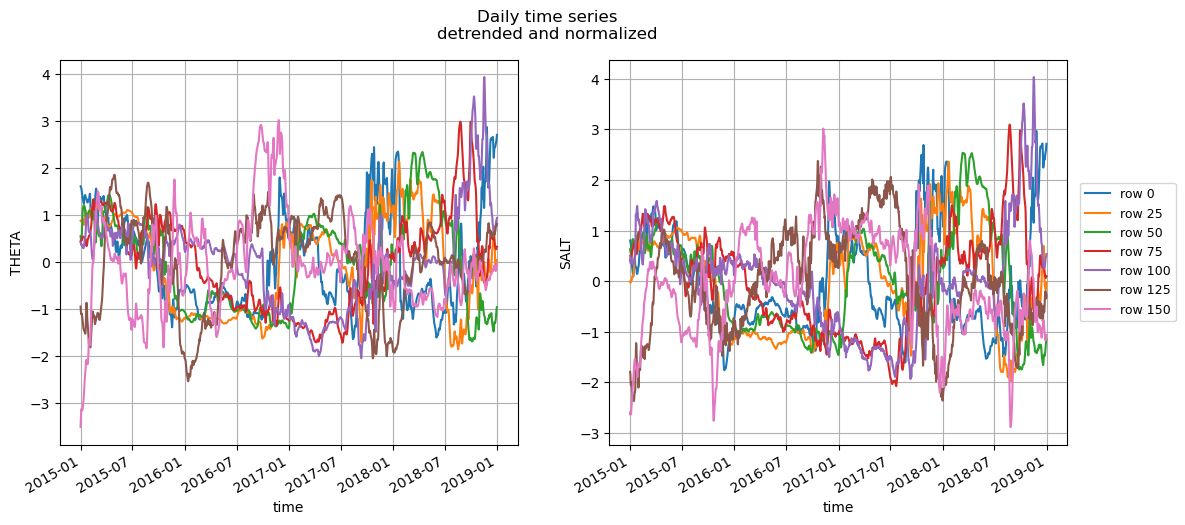

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row000_detrended_norm.plot(ax=ax1,label='row 0')
theta_row025_detrended_norm.plot(ax=ax1,label='row 25')
theta_row050_detrended_norm.plot(ax=ax1,label='row 50')
theta_row075_detrended_norm.plot(ax=ax1,label='row 75')
theta_row100_detrended_norm.plot(ax=ax1,label='row 100')
theta_row125_detrended_norm.plot(ax=ax1,label='row 125')
theta_row150_detrended_norm.plot(ax=ax1,label='row 150')
ax1.grid()

salt_row000_detrended_norm.plot(ax=ax2,label='row 0')
salt_row025_detrended_norm.plot(ax=ax2,label='row 25')
salt_row050_detrended_norm.plot(ax=ax2,label='row 50')
salt_row075_detrended_norm.plot(ax=ax2,label='row 75')
salt_row100_detrended_norm.plot(ax=ax2,label='row 100')
salt_row125_detrended_norm.plot(ax=ax2,label='row 125')
salt_row150_detrended_norm.plot(ax=ax2,label='row 150')
# ax2.legend()
ax2.grid()

plt.suptitle("Daily time series\ndetrended and normalized");
ax2.legend(loc='center right',fontsize=9, bbox_to_anchor=(1.25, 0.5))

ax1.set_ylabel("THETA")
ax2.set_ylabel("SALT");

### Plot monthly time series

Take monthly mean and then normalize values

In [73]:
theta_row000_detrended_month = theta_row000_detrended.resample(time='1M').mean('time')
theta_row025_detrended_month = theta_row025_detrended.resample(time='1M').mean('time')
theta_row050_detrended_month = theta_row050_detrended.resample(time='1M').mean('time')
theta_row075_detrended_month = theta_row075_detrended.resample(time='1M').mean('time')
theta_row100_detrended_month = theta_row100_detrended.resample(time='1M').mean('time')
theta_row125_detrended_month = theta_row125_detrended.resample(time='1M').mean('time')
theta_row150_detrended_month = theta_row150_detrended.resample(time='1M').mean('time')

salt_row000_detrended_month = salt_row000_detrended.resample(time='1M').mean('time')
salt_row025_detrended_month = salt_row025_detrended.resample(time='1M').mean('time')
salt_row050_detrended_month = salt_row050_detrended.resample(time='1M').mean('time')
salt_row075_detrended_month = salt_row075_detrended.resample(time='1M').mean('time')
salt_row100_detrended_month = salt_row100_detrended.resample(time='1M').mean('time')
salt_row125_detrended_month = salt_row125_detrended.resample(time='1M').mean('time')
salt_row150_detrended_month = salt_row150_detrended.resample(time='1M').mean('time')

In [74]:
theta_row000_detrended_month_norm = (theta_row000_detrended_month-theta_row000_detrended_month.mean())/theta_row000_detrended_month.std()
theta_row025_detrended_month_norm = (theta_row025_detrended_month-theta_row025_detrended_month.mean())/theta_row025_detrended_month.std()
theta_row050_detrended_month_norm = (theta_row050_detrended_month-theta_row050_detrended_month.mean())/theta_row050_detrended_month.std()
theta_row075_detrended_month_norm = (theta_row075_detrended_month-theta_row075_detrended_month.mean())/theta_row075_detrended_month.std()
theta_row100_detrended_month_norm = (theta_row100_detrended_month-theta_row100_detrended_month.mean())/theta_row100_detrended_month.std()
theta_row125_detrended_month_norm = (theta_row125_detrended_month-theta_row125_detrended_month.mean())/theta_row125_detrended_month.std()
theta_row150_detrended_month_norm = (theta_row150_detrended_month-theta_row150_detrended_month.mean())/theta_row150_detrended_month.std()

salt_row000_detrended_month_norm = (salt_row000_detrended_month-salt_row000_detrended_month.mean())/salt_row000_detrended_month.std()
salt_row025_detrended_month_norm = (salt_row025_detrended_month-salt_row025_detrended_month.mean())/salt_row025_detrended_month.std()
salt_row050_detrended_month_norm = (salt_row050_detrended_month-salt_row050_detrended_month.mean())/salt_row050_detrended_month.std()
salt_row075_detrended_month_norm = (salt_row075_detrended_month-salt_row075_detrended_month.mean())/salt_row075_detrended_month.std()
salt_row100_detrended_month_norm = (salt_row100_detrended_month-salt_row100_detrended_month.mean())/salt_row100_detrended_month.std()
salt_row125_detrended_month_norm = (salt_row125_detrended_month-salt_row125_detrended_month.mean())/salt_row125_detrended_month.std()
salt_row150_detrended_month_norm = (salt_row150_detrended_month-salt_row150_detrended_month.mean())/salt_row150_detrended_month.std()

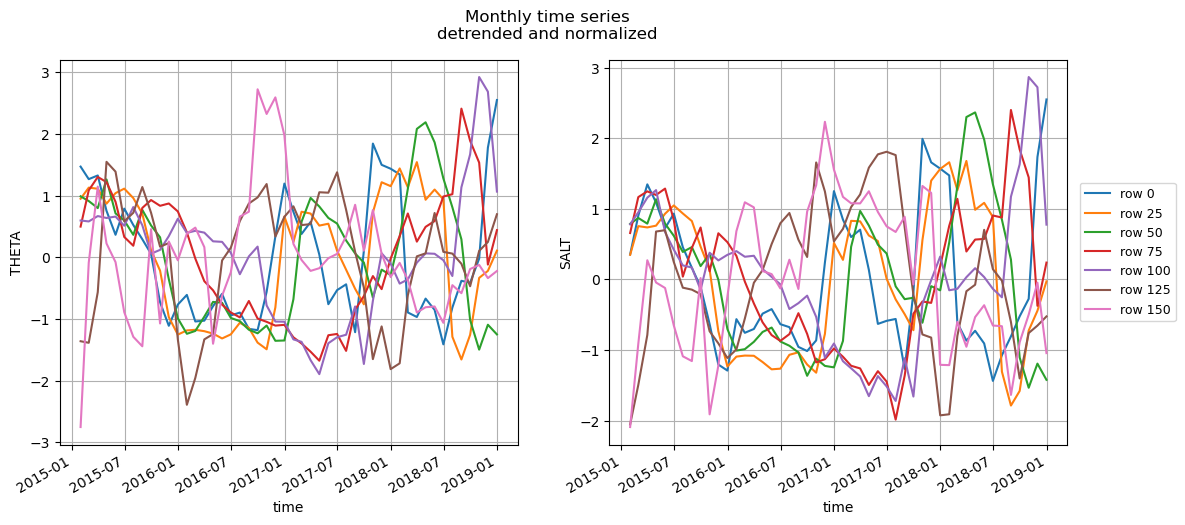

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row000_detrended_month_norm.plot(ax=ax1,label='row 0')
theta_row025_detrended_month_norm.plot(ax=ax1,label='row 25')
theta_row050_detrended_month_norm.plot(ax=ax1,label='row 50')
theta_row075_detrended_month_norm.plot(ax=ax1,label='row 75')
theta_row100_detrended_month_norm.plot(ax=ax1,label='row 100')
theta_row125_detrended_month_norm.plot(ax=ax1,label='row 125')
theta_row150_detrended_month_norm.plot(ax=ax1,label='row 150')
ax1.grid()

salt_row000_detrended_month_norm.plot(ax=ax2,label='row 0')
salt_row025_detrended_month_norm.plot(ax=ax2,label='row 25')
salt_row050_detrended_month_norm.plot(ax=ax2,label='row 50')
salt_row075_detrended_month_norm.plot(ax=ax2,label='row 75')
salt_row100_detrended_month_norm.plot(ax=ax2,label='row 100')
salt_row125_detrended_month_norm.plot(ax=ax2,label='row 125')
salt_row150_detrended_month_norm.plot(ax=ax2,label='row 150')
# ax2.legend()
ax2.grid()

ax2.legend(loc='center right',fontsize=9, bbox_to_anchor=(1.25, 0.5))
plt.suptitle("Monthly time series\ndetrended and normalized");

ax1.set_ylabel("THETA")
ax2.set_ylabel("SALT");

### Group by month and plot

Group by month and then normalize

In [76]:
# take monthly mean
theta_row000_AW_month = theta_row000_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row025_AW_month = theta_row025_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row050_AW_month = theta_row050_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row075_AW_month = theta_row075_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row100_AW_month = theta_row100_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row125_AW_month = theta_row125_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row150_AW_month = theta_row150_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

salt_row000_AW_month = salt_row000_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row025_AW_month = salt_row025_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row050_AW_month = salt_row050_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row075_AW_month = salt_row075_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row100_AW_month = salt_row100_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row125_AW_month = salt_row125_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row150_AW_month = salt_row150_detrended.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

In [77]:
# normalize
theta_row000_AW_month_norm = (theta_row000_AW_month-theta_row000_AW_month.mean())/theta_row000_AW_month.std()
theta_row025_AW_month_norm = (theta_row025_AW_month-theta_row025_AW_month.mean())/theta_row025_AW_month.std()
theta_row050_AW_month_norm = (theta_row050_AW_month-theta_row050_AW_month.mean())/theta_row050_AW_month.std()
theta_row075_AW_month_norm = (theta_row075_AW_month-theta_row075_AW_month.mean())/theta_row075_AW_month.std()
theta_row100_AW_month_norm = (theta_row100_AW_month-theta_row100_AW_month.mean())/theta_row100_AW_month.std()
theta_row125_AW_month_norm = (theta_row125_AW_month-theta_row125_AW_month.mean())/theta_row125_AW_month.std()
theta_row150_AW_month_norm = (theta_row150_AW_month-theta_row150_AW_month.mean())/theta_row150_AW_month.std()

salt_row000_AW_month_norm = (salt_row000_AW_month-salt_row000_AW_month.mean())/salt_row000_AW_month.std()
salt_row025_AW_month_norm = (salt_row025_AW_month-salt_row025_AW_month.mean())/salt_row025_AW_month.std()
salt_row050_AW_month_norm = (salt_row050_AW_month-salt_row050_AW_month.mean())/salt_row050_AW_month.std()
salt_row075_AW_month_norm = (salt_row075_AW_month-salt_row075_AW_month.mean())/salt_row075_AW_month.std()
salt_row100_AW_month_norm = (salt_row100_AW_month-salt_row100_AW_month.mean())/salt_row100_AW_month.std()
salt_row125_AW_month_norm = (salt_row125_AW_month-salt_row125_AW_month.mean())/salt_row125_AW_month.std()
salt_row150_AW_month_norm = (salt_row150_AW_month-salt_row150_AW_month.mean())/salt_row150_AW_month.std()

In [78]:
# label months
theta_row000_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row025_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row050_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row075_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row100_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row125_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row150_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

salt_row000_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row025_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row050_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row075_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row100_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row125_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row150_AW_month_norm['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

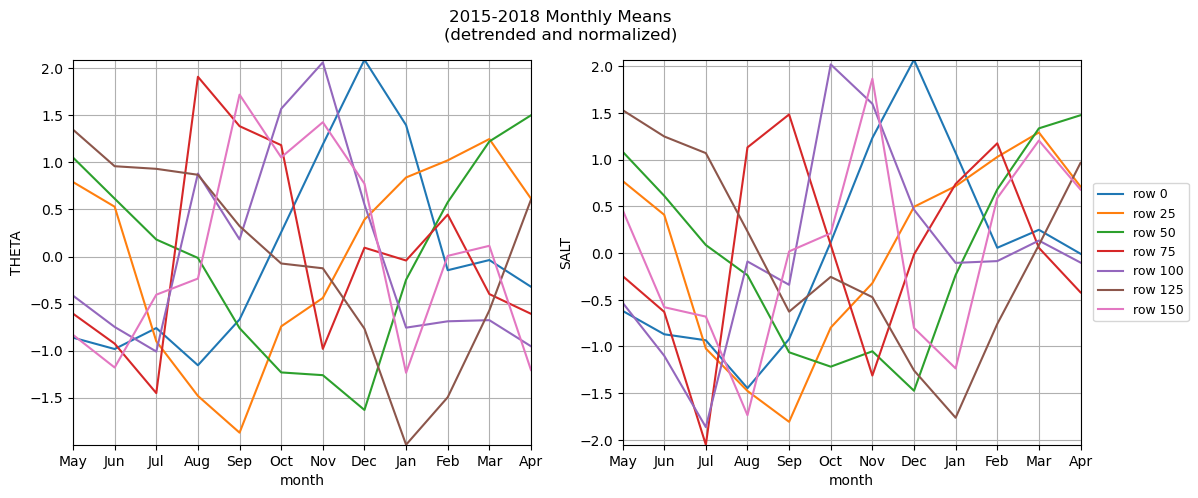

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row000_AW_month_norm.plot(ax=ax1,label='row 0')
theta_row025_AW_month_norm.plot(ax=ax1,label='row 25')
theta_row050_AW_month_norm.plot(ax=ax1,label='row 50')
theta_row075_AW_month_norm.plot(ax=ax1,label='row 75')
theta_row100_AW_month_norm.plot(ax=ax1,label='row 100')
theta_row125_AW_month_norm.plot(ax=ax1,label='row 125')
theta_row150_AW_month_norm.plot(ax=ax1,label='row 150')
ax1.grid()

salt_row000_AW_month_norm.plot(ax=ax2,label='row 0')
salt_row025_AW_month_norm.plot(ax=ax2,label='row 25')
salt_row050_AW_month_norm.plot(ax=ax2,label='row 50')
salt_row075_AW_month_norm.plot(ax=ax2,label='row 75')
salt_row100_AW_month_norm.plot(ax=ax2,label='row 100')
salt_row125_AW_month_norm.plot(ax=ax2,label='row 125')
salt_row150_AW_month_norm.plot(ax=ax2,label='row 150')
ax2.grid()

ax2.legend(loc='center right',fontsize=9, bbox_to_anchor=(1.25, 0.5))
plt.suptitle("2015-2018 Monthly Means\n(detrended and normalized)");

ax1.margins(x=0,y=0)
ax2.margins(x=0,y=0)

ax1.set_ylabel("THETA")
ax2.set_ylabel("SALT");

### Group by season and plot

Calculate seasonal climatologies

In [85]:
## define a function to map timestamps to seasons
def map_to_season(month):
    if 1 <= month <= 3:
        return 'JFM'
    elif 4 <= month <= 6:
        return 'AMJ'
    elif 7 <= month <= 9:
        return 'JAS'
    elif 10 <= month <= 12:
        return 'OND'

## create function to take seasonal means
def seasonal_mean(ds):
    ## apply the above function to create a new coordinate 'season'
    seasons_array = xr.apply_ufunc(map_to_season, ds['time.month'], dask = 'allowed', vectorize = True)
    ds.coords['season'] = ('time', seasons_array.values)

    # group by 'season' and calculate the mean of 'value' for each season
    seasonal_means = ds.groupby('season').mean()
    return seasonal_means

In [86]:
## apply function to datasets

## theta
theta_row000_season = seasonal_mean(theta_row000_detrended)
theta_row025_season = seasonal_mean(theta_row025_detrended)
theta_row050_season = seasonal_mean(theta_row050_detrended)
theta_row075_season = seasonal_mean(theta_row075_detrended)
theta_row100_season = seasonal_mean(theta_row100_detrended)
theta_row125_season = seasonal_mean(theta_row125_detrended)
theta_row150_season = seasonal_mean(theta_row150_detrended)

## salinity
salt_row000_season = seasonal_mean(salt_row000_detrended)
salt_row025_season = seasonal_mean(salt_row025_detrended)
salt_row050_season = seasonal_mean(salt_row050_detrended)
salt_row075_season = seasonal_mean(salt_row075_detrended)
salt_row100_season = seasonal_mean(salt_row100_detrended)
salt_row125_season = seasonal_mean(salt_row125_detrended)
salt_row150_season = seasonal_mean(salt_row150_detrended)

normalize

In [87]:
theta_row000_season_norm = (theta_row000_season-theta_row000_season.mean())/theta_row000_season.std()
theta_row025_season_norm = (theta_row025_season-theta_row025_season.mean())/theta_row025_season.std()
theta_row050_season_norm = (theta_row050_season-theta_row050_season.mean())/theta_row050_season.std()
theta_row075_season_norm = (theta_row075_season-theta_row075_season.mean())/theta_row075_season.std()
theta_row100_season_norm = (theta_row100_season-theta_row100_season.mean())/theta_row100_season.std()
theta_row125_season_norm = (theta_row125_season-theta_row125_season.mean())/theta_row125_season.std()
theta_row150_season_norm = (theta_row150_season-theta_row150_season.mean())/theta_row150_season.std()

salt_row000_season_norm = (salt_row000_season-salt_row000_season.mean())/salt_row000_season.std()
salt_row025_season_norm = (salt_row025_season-salt_row025_season.mean())/salt_row025_season.std()
salt_row050_season_norm = (salt_row050_season-salt_row050_season.mean())/salt_row050_season.std()
salt_row075_season_norm = (salt_row075_season-salt_row075_season.mean())/salt_row075_season.std()
salt_row100_season_norm = (salt_row100_season-salt_row100_season.mean())/salt_row100_season.std()
salt_row125_season_norm = (salt_row125_season-salt_row125_season.mean())/salt_row125_season.std()
salt_row150_season_norm = (salt_row150_season-salt_row150_season.mean())/salt_row150_season.std()

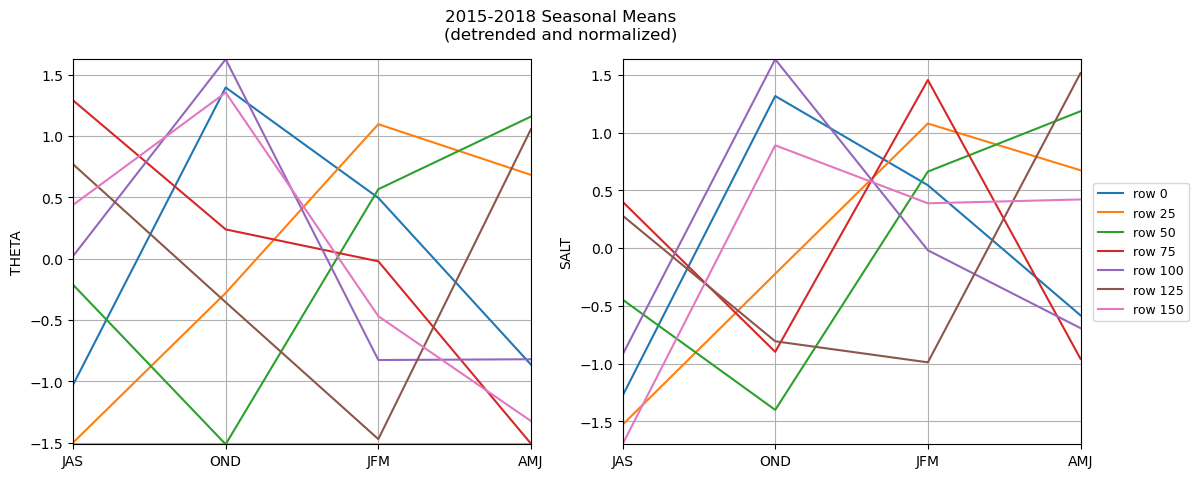

In [89]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

ax1.plot([1,2,3,4],theta_row000_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
ax1.plot([1,2,3,4],theta_row025_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
ax1.plot([1,2,3,4],theta_row050_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
ax1.plot([1,2,3,4],theta_row075_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
ax1.plot([1,2,3,4],theta_row100_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
ax1.plot([1,2,3,4],theta_row125_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
ax1.plot([1,2,3,4],theta_row150_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
ax1.set_xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
ax1.grid();

ax2.plot([1,2,3,4],salt_row000_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
ax2.plot([1,2,3,4],salt_row025_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
ax2.plot([1,2,3,4],salt_row050_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
ax2.plot([1,2,3,4],salt_row075_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
ax2.plot([1,2,3,4],salt_row100_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
ax2.plot([1,2,3,4],salt_row125_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
ax2.plot([1,2,3,4],salt_row150_season_norm.sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
ax2.set_xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
ax2.grid();

ax2.legend(loc='center right',fontsize=9, bbox_to_anchor=(1.25, 0.5))
plt.suptitle("2015-2018 Seasonal Means\n(detrended and normalized)");

ax1.margins(x=0,y=0)
ax2.margins(x=0,y=0)

ax1.set_ylabel("THETA")
ax2.set_ylabel("SALT");